<a href="https://colab.research.google.com/github/bflaggs/DSPS_BFlaggs/blob/main/HW8/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls .kaggle

kaggle.json


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [4]:
import pandas as pd
import json
import os
import pylab as pl
from pprint import pprint
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [48]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve

In [ ]:
envs = json.load(open(".kaggle/kaggle.json", "r"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15765  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9535  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4309  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3494  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle competitions download -c higgs-boson

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 41.1MB/s]
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 443kB/s]
 95% 33.0M/34.8M [00:00<00:00, 91.1MB/s]
100% 34.8M/34.8M [00:00<00:00, 99.6MB/s]
 65% 11.0M/16.9M [00:00<00:00, 110MB/s]
100% 16.9M/16.9M [00:00<00:00, 107MB/s]


In [ ]:
!ls -ltr

total 55574
drwx------ 2 root root     4096 Nov 12 20:18 titanic
-rw------- 1 root root  2702527 Nov 16 21:20 random_submission.zip
-rw------- 1 root root 36483908 Nov 16 21:20 test.zip
-rw------- 1 root root     3223 Nov 16 21:20 HiggsBosonCompetition_AMSMetric_rev1.py
-rw------- 1 root root 17712751 Nov 16 21:20 training.zip


In [ ]:
!mkdir HiggsBoson

In [ ]:
!mv training.zip test.zip random_submission.zip HiggsBosonCompetition_AMSMetric_rev1.py ./HiggsBoson/.

In [6]:
cd HiggsBoson

/content/drive/MyDrive/HiggsBoson


In [7]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv
random_submission.csv			 training.csv


In [ ]:
!unzip training.zip 

Archive:  training.zip
  inflating: training.csv            


In [ ]:
!unzip test.zip 

Archive:  test.zip
  inflating: test.csv                


In [ ]:
!unzip random_submission.zip 

Archive:  random_submission.zip
  inflating: random_submission.csv   


In [ ]:
!rm test.zip training.zip random_submission.zip

In [8]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv
random_submission.csv			 training.csv


In [9]:
higgsdataNoCuts = pd.read_csv("training.csv")

In [10]:
higgsdataNoCuts.Label.unique()

array(['s', 'b'], dtype=object)

In [11]:
labels = np.array(higgsdataNoCuts["Label"])
weights = np.array(higgsdataNoCuts["Weight"])

In [12]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [13]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [14]:
higgsdata = higgsdataNoCuts.drop(columns=['Weight', 'Label'])

In [15]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [16]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(higgsdata.values, labels, test_size=0.2)

In [18]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state=0, max_depth=8)
print('Parameters currently in use (RF):\n')
pprint(rf.get_params())

Parameters currently in use (RF):

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [19]:
gbt = GradientBoostingClassifier(random_state=69420, max_depth=8)
print('Parameters currently in use (GBT):\n')
pprint(gbt.get_params())

Parameters currently in use (GBT):

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 69420,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [20]:
rf.fit(X_train, y_train)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, random_state=69420)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [21]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.830295, 0.827)

In [22]:
gbt.score(X_train, y_train), gbt.score(X_test, y_test)

(0.8682, 0.84222)

#INCLUDE SENTENCE ABOUT OVERTRAINING FOR BOTH RF AND GBT HERE

- Produce a confusion matrix for each model and compare them


 



In [23]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

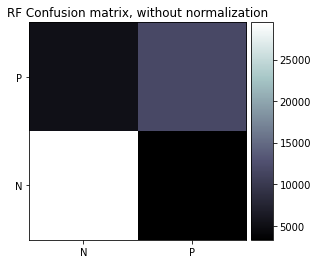

In [24]:
plot_confusion_matrix(y_test,rf.predict(X_test),title='RF')

#CAPTION HERE

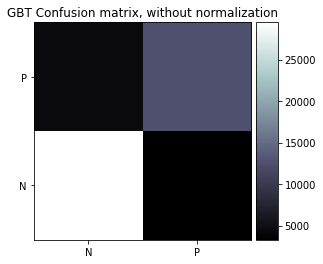

In [25]:
plot_confusion_matrix(y_test,gbt.predict(X_test),title='GBT')

#CAPTION HERE


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [26]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata.values, weights, test_size=0.2)

In [27]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=8,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=8,
                                  random_state=69420)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(max_depth=8, random_state=69420)

In [29]:
rfR.score(traindata_weights, train_weights), rfR.score(testdata_weights, test_weights)

(0.6191018516698084, 0.5976417105370035)

In [30]:
gbtR.score(traindata_weights, train_weights), gbtR.score(testdata_weights, test_weights)

(0.6967590111994499, 0.6243201970884817)

#INCLUDE SENTENCE ABOUT PERFORMANCE FOR BOTH RF AND GBT REGRESSORS HERE

In [31]:
rfR.predict(testdata_weights)

array([5.89515446, 0.11582888, 2.97176959, ..., 0.6941376 , 1.17244556,
       0.04019753])

In [32]:
gbtR.predict(testdata_weights)

array([6.13470709e+00, 6.80568463e-02, 3.75001232e+00, ...,
       9.79381933e-01, 5.57919148e-01, 5.41680491e-03])

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [33]:
def L1(y_true, y_pred):
    L1 = np.sum(np.abs(y_true - y_pred))
    return L1

def L2(y_true, y_pred):
    L2 = np.sum((y_true - y_pred)**2)
    return L2

In [34]:
L1(test_weights, rfR.predict(testdata_weights)), L2(test_weights, rfR.predict(testdata_weights))

(42203.180724691476, 70711.85703444967)

In [35]:
L1(test_weights, gbtR.predict(testdata_weights)), L2(test_weights, gbtR.predict(testdata_weights))

(39807.836749683775, 66023.28623492323)

#DISCUSS L1 AND L2 RESULTS

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [36]:
rf.feature_importances_

array([0.0003688 , 0.26600337, 0.17774306, 0.1165516 , 0.01535782,
       0.03217528, 0.03273315, 0.0057821 , 0.03527928, 0.00785615,
       0.01237609, 0.05715332, 0.05714043, 0.02805151, 0.07281809,
       0.00151612, 0.00036488, 0.00977062, 0.00228096, 0.00040534,
       0.02328447, 0.00037581, 0.00626584, 0.0077558 , 0.00742961,
       0.00668989, 0.00211175, 0.00142063, 0.00132398, 0.00068255,
       0.01093171])

In [38]:
#find most important features
rf.feature_importances_
features=[np.argsort(rf.feature_importances_)[-1],
  np.argsort(rf.feature_importances_)[-2],
  np.argsort(rf.feature_importances_)[-3],
  np.argsort(rf.feature_importances_)[-4]]
print("Important feautures: "+higgsdata.columns[features[0]]+', '
      +higgsdata.columns[features[1]]+', '
      +higgsdata.columns[features[2]]+', '
      +higgsdata.columns[features[3]])

Important feautures: DER_mass_MMC, DER_mass_transverse_met_lep, DER_mass_vis, PRI_tau_pt


In [39]:
random_grid = {'n_estimators': [10, 100],
               'max_depth': [3, 10, None],
               'bootstrap': [True, False],
               'max_features': ['auto', 'sqrt']
               } 

In [40]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [44]:
higgsdataBestFourFeatures = higgsdata.iloc[:, features]

In [45]:
higgsdataBestFourFeatures

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
2,-999.000,162.172,125.953,32.154
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209
...,...,...,...,...
249995,-999.000,71.989,36.548,24.754
249996,-999.000,58.179,68.083,23.416
249997,105.457,60.526,75.839,35.636
249998,94.951,19.362,68.812,27.944


In [60]:
traindata, testdata, train_labels, test_labels = train_test_split(higgsdataBestFourFeatures.values, labels, test_size=0.2)

In [61]:
rfBest = RandomForestClassifier(random_state=0)
print('Parameters currently in use (RF best):\n')
pprint(rfBest.get_params())

Parameters currently in use (RF best):

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 24 different combinations
random_search = RandomizedSearchCV(estimator = rfBest, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [63]:
random_search.fit(traindata, train_labels)
                  

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [64]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': False}
Best score is 0.789470001889483


In [58]:
df = pd.DataFrame(random_search.cv_results_)


In [65]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,45.065041,0.198814,2.154934,0.004026,100,auto,None,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.806591,0.805301,0.807593,0.806495,0.000938,1


# Extra Credit: Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [69]:
rfBest.fit(traindata, train_labels.flatten()=="s")

RandomForestClassifier(random_state=0)

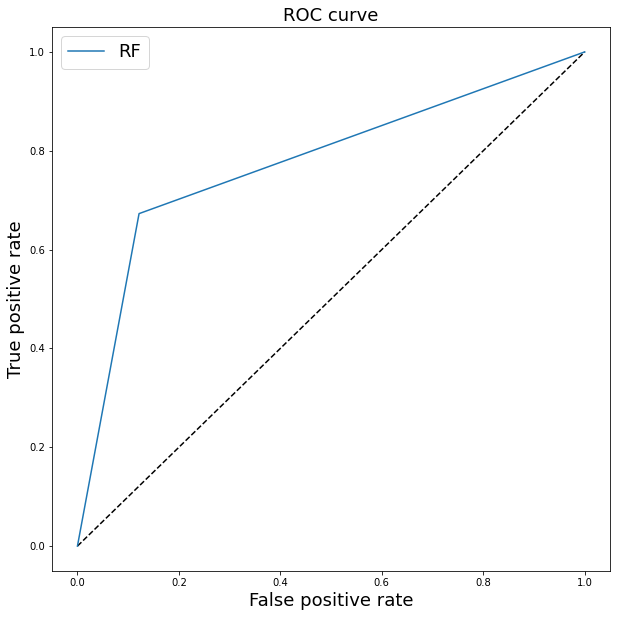

In [72]:
# The random forest model by itself
y_pred_grd_rfcat = rfBest.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_labels.flatten()=="s", rfBest.predict(testdata))

plt.figure(1, figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()
